In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
import requests
from bs4 import BeautifulSoup as soup

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

import seaborn as sns
sns.set()

In [3]:
root = r'C:\Users\Chill\nfl'
YEAR = 2020
file_path = f'C:\\Users\\Chill\\nfl\\play_by_play_{YEAR}.csv.gz'
file_path

'C:\\Users\\Chill\\nfl\\play_by_play_2020.csv.gz'

In [4]:
#download from 2015 to 2020 and save data to folder
def download_and_store_data(year):    
    data = pd.read_csv('https://github.com/guga31bb/nflfastR-data/blob/master/data/' \
                             'play_by_play_' + str(year) + '.csv.gz?raw=True',
                             compression='gzip', low_memory=False)
    #save to disk
    path = r'C:\Users\Chill\nfl'
    file_path = f'C:\\Users\\Chill\\nfl\\play_by_play_{year}.csv.gz'

    data.to_csv(file_path, compression='gzip', index=False)

#load data from disk
def load_data(year):
    filepath = f'C:\\Users\\Chill\\nfl\\play_by_play_{year}.csv.gz'
    data = pd.read_csv(filepath, compression='gzip', low_memory=False)                
    return data

def load_multi_years(all_data=True):
    if all_data:
        #list all downloaded data
        data = [file for file in os.listdir(root) if 'play_by_play' in file]
    
        #for each year, read into a df
        df = pd.DataFrame()
        dfs = []
        for file in data:
            df_year = pd.read_csv(file, compression='gzip', low_memory=False)
            dfs.append(df_year)
#         dfs = [pd.read_csv(file, compression='gzip') for file in data]
        df = pd.concat(dfs)
        return df
        #concat all dfs in list using concat

In [5]:
COLORS = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

In [6]:
data = load_data(2021)
data.head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
0,1,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,NaN,NaN,NaN,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,-1.399805,NaN,NaN,NaN,NaN,NaN,0.491433,-49.143299
3,76,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,0.032412,1.165133,5.803177,4.0,0.896654,0.125098,0.697346,30.265415
4,100,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,-1.532898,0.256036,4.147637,2.0,0.965009,0.965009,0.978253,2.174652


In [7]:
#calculate epa per team per match

#filter data first
df = data[
          (data.play_type.isin(['no_play','pass','run'])) &
#           (data.two_point_attempt==0) &
          (data['epa'].isna()==False)
          ]

In [9]:
#check that there's no play whose epa is missing
df.epa.isnull().sum()

0

In [11]:
result = df.groupby(['game_id', 'posteam'])['epa'].mean()

In [15]:
result

game_id          posteam
2021_01_ARI_TEN  ARI        0.158533
                 TEN       -0.326721
2021_01_BAL_LV   BAL       -0.040739
                 LV         0.004540
2021_01_CHI_LA   CHI       -0.114370
                              ...   
2021_21_CIN_KC   KC         0.007644
2021_21_SF_LA    LA         0.085424
                 SF        -0.052629
2021_22_LA_CIN   CIN       -0.186360
                 LA        -0.057926
Name: epa, Length: 570, dtype: float64

In [16]:
r1 = result.reset_index()
r1

,game_id,posteam,epa
0,2021_01_ARI_TEN,ARI,0.158533
1,2021_01_ARI_TEN,TEN,-0.326721
2,2021_01_BAL_LV,BAL,-0.040739
3,2021_01_BAL_LV,LV,0.004540
4,2021_01_CHI_LA,CHI,-0.114370
...,...,...,...
565,2021_21_CIN_KC,KC,0.007644
566,2021_21_SF_LA,LA,0.085424
567,2021_21_SF_LA,SF,-0.052629
568,2021_22_LA_CIN,CIN,-0.186360


In [43]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
#https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger

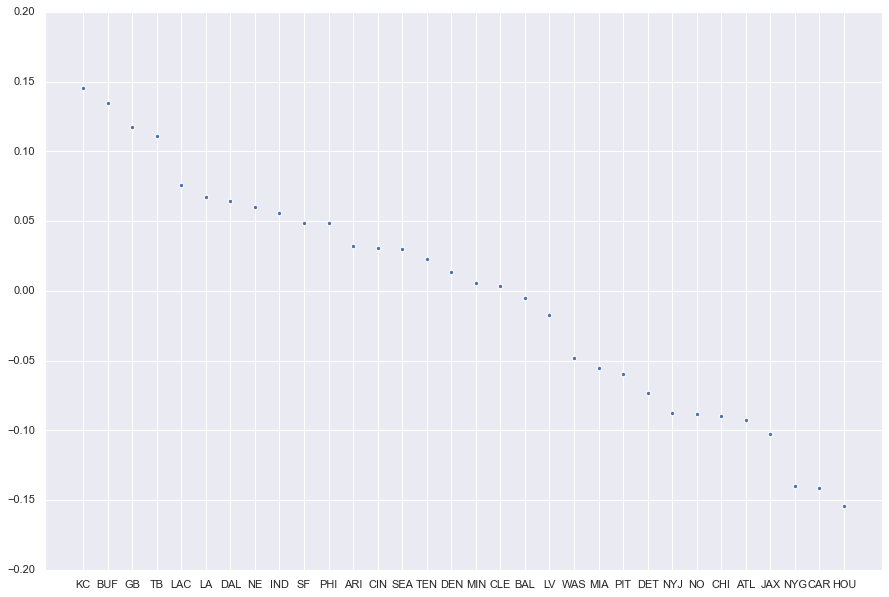

In [44]:
#find average of each team epa
#for each team:
#calculate average of game epa
r2 = r1.groupby('posteam')['epa'].mean().sort_values(ascending=False)
plt.scatter(r2.index, r2.values)
# type(r2) # Sereis

<AxesSubplot:xlabel='posteam', ylabel='epa'>

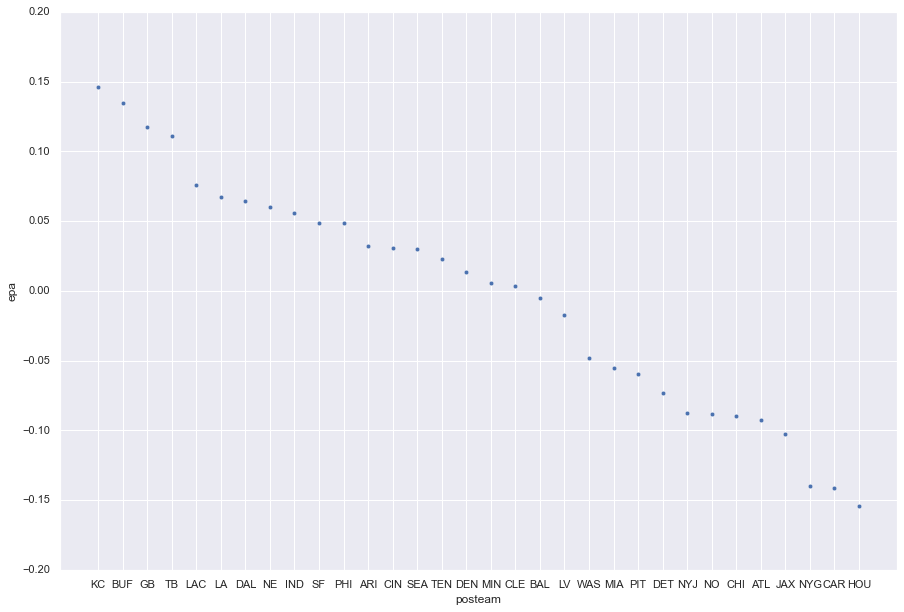

In [45]:
sns.scatterplot(data=r2)

https://stackoverflow.com/questions/20110170/turn-pandas-multi-index-into-column